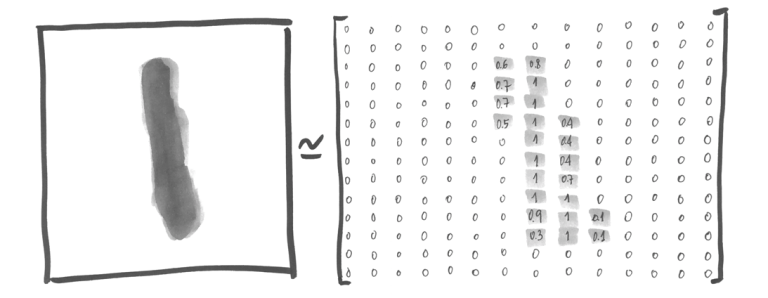

#### MNIST Introduction
- MNIST (Mixed National Institute of Standards and Technology database)
- **손글씨 숫자(0~9) 이미지 데이터**
- 각 이미지는 **가로와 세로가 각각 28px, 흑백 이미지**로 만들어져 있음
- Training data == 55,000장, Validation data == 5,000장, Test data = 10,000장

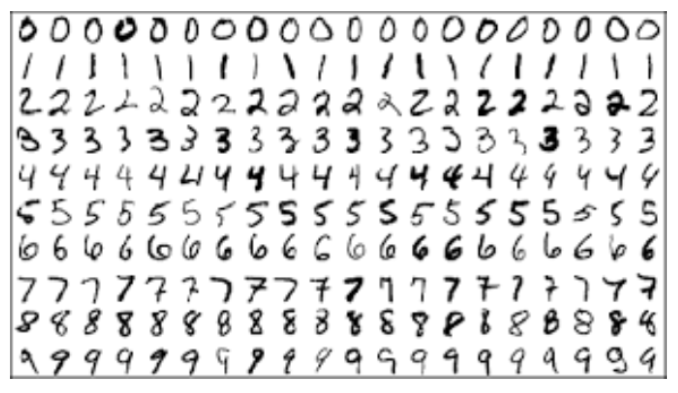

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


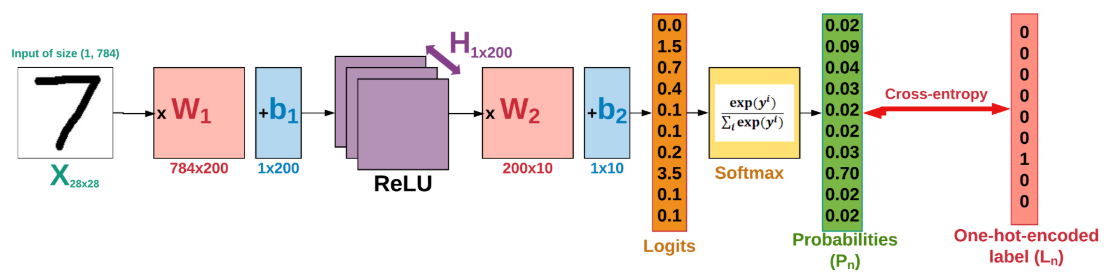

In [4]:
# mnist -> train / test / validation
# mnist.train -> 'images'(x_data) 'labels'(y_data), 'num_examples'

#type(mnist.test)
type(mnist.train.images) # 어떤 자료형일까요?

numpy.ndarray

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.labels.shape 

(55000, 10)

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
import pandas as pd

df = pd.DataFrame(mnist.train.labels) # to pd.DataFrame
df.head()

0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### 2. Build the model

In [9]:
# 데이터가 흘러들어올 접시(placeholder) 만들기 

X = tf.placeholder(tf.float32, [None, 784]) # [# of batch data, # of features(columns) == 총 784개의 열]
Y = tf.placeholder(tf.float32, [None, 10]) # 0~9 == 총 10개의 열

In [10]:
# 모든 Parameter Theta는 Variable로 선언

W1 = tf.Variable(tf.random_normal([784, 128], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

In [11]:
W2 = tf.Variable(tf.random_normal([128, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [12]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3) # 마지막 층도 행렬곱까지만 진행

#### 3. Set the criterion

In [13]:
# cost = tf.losses.mean_squared_error(Y, model) # for Regression

cost = tf.losses.softmax_cross_entropy(Y, model) # for Classification, "cross-entropy" after "softmax"
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost) # Select optimizer & connect with cost function (recommended start : "Adam")

#### 4. Train the model

In [14]:
init = tf.global_variables_initializer() # Initialize all global variables (Parameter Theta)
sess = tf.Session()
sess.run(init)

In [15]:
# Gradient descent를 적용하기 전까지 한번에 밀어넣는 데이터의 수 지정 (Batch size == 하나의 데이터 덩어리 내 데이터 수)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
print(total_batch)

550


In [16]:
#!pip install tqdm==4.31.1
#from tqdm import trange, tqdm_notebook
#for epoch in tqdm_notebook(range(15)):

In [17]:
#from tqdm import trange, tqdm_notebook
#for epoch in tqdm_notebook(range(15)):

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch): # iterate over # of batches
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],feed_dict={X: batch_xs, Y: batch_ys}) # 먹여줄(feed) 딕셔너리(dict)
        total_cost += cost_val

    test_cost = sess.run([cost], feed_dict={X: mnist.test.images, Y: mnist.test.labels}) # current test error
    
    print('Epoch: {}'.format(epoch+1), 
          '|| Avg. Training cost = {:.3f}'.format(total_cost / total_batch),
          '|| Current Test cost = {:.3f}'.format(test_cost[0]))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.451 || Current Test cost = 0.227
Epoch: 2 || Avg. Training cost = 0.176 || Current Test cost = 0.144
Epoch: 3 || Avg. Training cost = 0.118 || Current Test cost = 0.106
Epoch: 4 || Avg. Training cost = 0.090 || Current Test cost = 0.103
Epoch: 5 || Avg. Training cost = 0.068 || Current Test cost = 0.090
Epoch: 6 || Avg. Training cost = 0.055 || Current Test cost = 0.079
Epoch: 7 || Avg. Training cost = 0.045 || Current Test cost = 0.081
Epoch: 8 || Avg. Training cost = 0.037 || Current Test cost = 0.087
Epoch: 9 || Avg. Training cost = 0.029 || Current Test cost = 0.071
Epoch: 10 || Avg. Training cost = 0.025 || Current Test cost = 0.097
Epoch: 11 || Avg. Training cost = 0.021 || Current Test cost = 0.094
Epoch: 12 || Avg. Training cost = 0.018 || Current Test cost = 0.105
Epoch: 13 || Avg. Training cost = 0.017 || Current Test cost = 0.094
Epoch: 14 || Avg. Training cost = 0.013 || Current Test cost = 0.104
Epoch: 15 || Avg. Training cost = 0.013 || 

In [18]:
# # next_batch() 함수를 이용할 수 없는 다른 데이터셋의 경우, 
# # 직접 batch 함수를 만들어쓰려면 아래의 코드를 활용해주세요. 

# def shuffle_batch(X, y, batch_size):
#     rnd_idx = np.random.permutation(len(X))
#     n_batches = len(X) // batch_size
#     for batch_idx in np.array_split(rnd_idx, n_batches):
#         X_batch, y_batch = X[batch_idx], y[batch_idx]
#         yield X_batch, y_batch

# # (original) for i in range(total_batch): batch_xs, batch_ys = mnist.train.next_batch(batch_size) ~~~
# # (new) for batch_xs, batch_ys in shuffle_batch(X_train, y_train, batch_size): ~~~`

- for i in range(total_batch): batch_xs, batch_ys = mnist.train.next_batch(batch_size) ~~  
- for batch_xs, batch_ys in shuffle_batch(X_train, y_train, batch_size): ~~  

#### 5. Test the model

In [19]:
# tf.argmax([0.1 0 0 0.7 0 0.2 0 0 0 0]) -> 3 (가장 큰 값의 index를 return)

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # model : 예측값, Y : 실제 정답
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

### cast
- **형 변환 함수이다. True -> 1 , False -> 0**

In [20]:
print('정확도 :', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

정확도 : 0.9757


In [21]:
# 모델 예측 결과값

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print(list(predicted_labels)[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [22]:
# 실제 정답 

import numpy as np
print(np.argmax(mnist.test.labels, 1)[:10])

[7 2 1 0 4 1 4 9 5 9]
